# Project 1: SAT & ACT Analysis

## What are the SAT and ACT?

The SAT and ACT are standardized tests taken in high school that are generally used for college admissions decisions and awarding merit-based scholarships.

The SAT, or Scholastic Assessment Test, is a standardized test aimed at measuring literacy, numeracy and writing skills. Scores on the SAT range from 400 to 1600, combining test results from two 800-point sections: mathematics, and critical reading and writing. 

The ACT, originally an abbreviation of American College Testing, is another standardized test divided into four mandatory sections: English, Math, Reading, and Science. The test, as a whole, is graded on a scale of 1-36. 

in the United States, states have experimented between implementing mandatory standardized testing (be it the SAT or ACT), offering free tests, or leaving taking the ACT or SAT up to the discretion of students.


## Problem Statement

In this paper, we explore two questions:
1) How does state policy affect SAT/ACT participation scores and composite scores?
2) How are SAT participation and composite scores related?

## Executive Summary


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

The various federal governments in the United States are faced with several challenges in standardizing tests in order to facilitate the massive cross-state exercise of college applications. Several studies have found that the SAT and ACT are good predictors of college performance (see Camara et al @ https://eric.ed.gov/?id=ED446592 for example), and states are keen to set their high school students up for success through good SAT or ACT test scores.

To this end, several states (e.g. DC, Ohio, Colorado) have mandatory tests, but this has received some negative feedback from school administrators, teachers, and students alike as they put a significant amount of pressure on both faculty and students. Furthermore, most of the states with mandatory tests pay for these tests on behalf of their students, and take up a significant portion of their education budget. 

Some states have experimented with offering free, but not mandatory tests. This project aimed to investigate the impact of participation on scores, and how removing the mandatory requirement would affect participation rates. There are psychological theories that suggest that students do better when applying for these tests on their own volition, rather than being forced to take them, but this falls outside the purview of this project and would require further experimentation.

By examining 2017 and 2018 ACT and SAT participation rates and scores, this project finds that participation rates and scores are strongly negatively correlated, and removing the mandatory requirement causes a large dip in participation rates. A caveat for this is that the sample size for states changing their policy mandates are too small to make any reasonable conclusion.

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1262]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [1043]:
import plotly.graph_objects as go

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [855]:
#Reading data files for ACT and SAT results
df_act2017 = pd.read_csv (r'C:\Users\Daniel\Desktop\GA\classes-master\Project1234\project_1\data\act_2017.csv')
df_act2018 = pd.read_csv (r'C:\Users\Daniel\Desktop\GA\classes-master\Project1234\project_1\data\act_2018_updated.csv')
df_sat2017 = pd.read_csv (r'C:\Users\Daniel\Desktop\GA\classes-master\Project1234\project_1\data\sat_2017.csv')
df_sat2018 = pd.read_csv (r'C:\Users\Daniel\Desktop\GA\classes-master\Project1234\project_1\data\sat_2018.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [604]:
print(df_act2017.head(5))
print(df_act2017.dtypes)
df_act2017.shape

      State Participation  English  Math  Reading  Science Composite
0  National           60%     20.3  20.7     21.4     21.0      21.0
1   Alabama          100%     18.9  18.4     19.7     19.4      19.2
2    Alaska           65%     18.7  19.8     20.4     19.9      19.8
3   Arizona           62%     18.6  19.8     20.1     19.8      19.7
4  Arkansas          100%     18.9  19.0     19.7     19.5      19.4
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


(52, 7)

In [605]:
print(df_act2018.head(5))
print(df_act2018.dtypes)
df_act2018.shape

        State  Percentage of Students Tested  Average Composite Score  \
0     Alabama                            100                     19.1   
1      Alaska                             33                     20.8   
2     Arizona                             66                     19.2   
3    Arkansas                            100                     19.4   
4  California                             27                     22.7   

   Average English Score  Average Math Score  Average Reading Score  \
0                   18.9                18.3                   19.6   
1                   19.8                20.6                   21.6   
2                   18.2                19.4                   19.5   
3                   19.1                18.9                   19.7   
4                   22.5                22.5                   23.0   

   Average Science Score  
0                   19.0  
1                   20.7  
2                   19.2  
3                   19.4  

(51, 7)

In [856]:
#Standardizing act2018 column names, since the order and naming conventions are different
df_act2018.columns = ["State", "Participation", "Composite", "English", "Math", "Reading", "Science"]

In [857]:
#Check the headers after changing the column names
df_act2018.head(1)

,State,Participation,Composite,English,Math,Reading,Science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0


In [567]:
print(df_sat2017.head(5))
print(df_sat2017.dtypes)
df_sat2017.shape

        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


(51, 5)

In [568]:
print(df_sat2018.head(5))
print(df_sat2018.dtypes)
df_sat2018.shape

        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


(51, 5)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

ACT/SAT Participation: Should be a float, but is currently encoded as a string.
ACT Math, Science, Reading and English should be a float, but some values are strings
SAT EBRW and Math should be floats
Composite scores should be floats

#### 4a. Does the data look complete? 

Answer: No

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

>SAT Scoring:
Maximum possible TOTAL SAT Score: 1600
Minimum possible TOTAL SAT Score: 400

>>Maximum possible EBRW Score: 800 /n Minimum possible EBRW Score: 200

>>Maximum possible Math Score: 800
Minimum possible Math Score: 200

>>Caveat for SAT Scoring:
Raw SAT scores are "equated" to ensure that scaled scores represent the same level of ability across different test dates. 

>ACT Scoring:
>>All sections maximum possible score: 36
All sections minimum possible score: 1

>>Composite score is an average of the 4 subtests.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [858]:
#Removes duplicates and prints out number of duplicates removed
def remove_duplicates(my_df):
    before_d = len(my_df)
    my_df.drop_duplicates(inplace=True)
    after_d = len(my_df)
    print(str(before_d-after_d) + " duplicates were removed!")

In [859]:
#this function cleans values by: 1) removing non-digits from string, 2)removing symbols in badsymbol list, 3)converting
#to float, and 4) checking if the value falls between two ranges. If perc_convert = "Y", output is divided by 100.
#Problematic values are replaced with NaN

allowed_symbol = "."

def clean_values(i, min_val=0, max_val=1600, perc_convert="N"):
    try:                                                              #runs if i is a string
        try:                                                          #runs if i is a float/int             
            i = float(''.join(j for j in i if j.isdigit() or j in allowed_symbol).strip())

            if min_val <= i <= max_val:                               #checks if number is within specified range
                if perc_convert == "Y":                               #checks if number needs to be divided by 100
                    return i/100
                else:
                    return i
            else:
                return np.nan
        except:
            if min_val <= i <= max_val:
                if perc_convert == "Y":
                    return i/100
                else:
                    return i
            else:
                return np.nan
            
    except:
        return np.nan
            


In [860]:
#runs remove duplicate function on the dataframes
remove_duplicates(df_act2017)
remove_duplicates(df_act2018)
remove_duplicates(df_sat2017)
remove_duplicates(df_sat2018)

0 duplicates were removed!
0 duplicates were removed!
0 duplicates were removed!
0 duplicates were removed!


In [861]:
#Cleaning "Participation" column values
#Remove % from Participation columns, converts to float, and divides by 100. 
for df_name in [df_act2017, df_act2018, df_sat2017, df_sat2018]:
    df_name["Participation"] = df_name["Participation"].apply(clean_values, args = (1, 100, "Y"))


In [862]:
#Cleaning data for ACT2017 and ACT2018
#Checks for non-numeric values and converts to string
for col in df_act2017[["English", "Math", "Reading", "Science", "Composite"]]:
    df_act2017[col]=df_act2017[col].apply(clean_values, args = (1, 36))
    
for col in df_act2018[["English", "Math", "Reading", "Science", "Composite"]]:
    df_act2018[col]=df_act2018[col].apply(clean_values, args = (1, 36))

In [863]:
#Cleaning data for SAT2017 and SAT2018
#Note that min/max scores for components are 200/800. Accordingly, total min/max scores are 400/1600
for col in df_sat2017[["Evidence-Based Reading and Writing", "Math"]]:
    df_sat2017[col]=df_sat2017[col].apply(clean_values, args = (200, 800))

for col in df_sat2017[["Total"]]:
    df_sat2017[col]=df_sat2017[col].apply(clean_values, args = (400, 1600))
    
for col in df_sat2018[["Evidence-Based Reading and Writing", "Math"]]:
    df_sat2018[col]=df_sat2018[col].apply(clean_values, args = (200, 800))

for col in df_sat2018[["Total"]]:
    df_sat2018[col]=df_sat2018[col].apply(clean_values, args = (400, 1600))

In [864]:
#Cleaning format in "state" column - all values standardized to Title format
for i in [df_act2017, df_act2018, df_sat2017, df_sat2018]:
    i["State"]=i["State"].map(lambda x: x.title())

In [865]:
df_act2017.style.highlight_null()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.6,20.3,20.7,21.4,21,21
1,Alabama,1,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1,18.9,19,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District Of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


In [866]:
df_act2018.style.highlight_null()

,State,Participation,Composite,English,Math,Reading,Science
0,Alabama,1,19.1,18.9,18.3,19.6,19
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23,22.1
5,Colorado,0.3,23.9,23.9,23.2,24.4,23.5
6,Connecticut,0.26,25.6,26,24.8,26.1,24.9
7,Delaware,0.17,23.2,23.7,23.1,24.5,23.4
8,District Of Columbia,0.32,23.6,23.7,22.7,24.4,23
9,Florida,0.66,19.9,19.2,19.3,21.1,19.5


In [867]:
df_sat2017.style.highlight_null()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.3,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201
6,Connecticut,1,530,512,1041
7,Delaware,1,503,492,996
8,District Of Columbia,1,482,468,950
9,Florida,0.83,520,497,1017


In [868]:
df_sat2018.style.highlight_null()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.6,540,536,1076
5,Colorado,1,519,506,1025
6,Connecticut,1,535,519,1053
7,Delaware,1,505,492,998
8,District Of Columbia,0.92,497,480,977
9,Florida,0.56,550,549,1099


#### 5. What are your data types? 
Display the data types of each feature. 

In [869]:
print("ACT2017 Data Types")
print(df_act2017.dtypes)
print("ACT2018 Data Types")
print(df_act2018.dtypes)
print("SAT2017 Data Types")
print(df_sat2017.dtypes)
print("SAT2018 Data Types")
print(df_sat2018.dtypes)

ACT2017 Data Types
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
ACT2018 Data Types
State             object
Participation    float64
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object
SAT2017 Data Types
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                  float64
Total                                   int64
dtype: object
SAT2018 Data Types
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

- Fix any individual values preventing other columns from being the appropriate type.

In [870]:
#shows all null values in df
print(df_act2017[df_act2017.isna().any(axis=1)])
print(df_act2018[df_act2018.isna().any(axis=1)])
print(df_sat2017[df_sat2017.isna().any(axis=1)])
print(df_sat2018[df_sat2018.isna().any(axis=1)])

Empty DataFrame
Columns: [State, Participation, English, Math, Reading, Science, Composite]
Index: []
Empty DataFrame
Columns: [State, Participation, Composite, English, Math, Reading, Science]
Index: []
       State  Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           0.69                                 536   NaN   1060
Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []


In [871]:
#corrects the problematic value
df_sat2017.at[20, "Math"] = 1060 - 536

In [875]:
df_act2017.at[21, "Science"] = 23.2

In [876]:
#Verify that value is fixed
df_sat2017[df_sat2017.isin(["Maryland"]).any(axis=1)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,0.69,536,524.0,1060


In [459]:
#adds new rows to act2018 and sat2018 for the distrit of colombia because I am poor and don't have excel
#df_sat2018 = df_sat2018.append(pd.Series(["District of Columbia", 0.92, 497, 480, 977], index=df_sat2018.columns ), ignore_index=True)

In [877]:
#converting int columns to float
df_sat2017[["Evidence-Based Reading and Writing", "Math", "Total"]] = df_sat2017[["Evidence-Based Reading and Writing", "Math", "Total"]].applymap(lambda x: float(x))
df_sat2018[["Evidence-Based Reading and Writing", "Math", "Total"]] = df_sat2018[["Evidence-Based Reading and Writing", "Math", "Total"]].applymap(lambda x: float(x))

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [878]:
print("ACT2017 Data Types")
print(df_act2017.dtypes)
print("ACT2018 Data Types")
print(df_act2018.dtypes)
print("SAT2017 Data Types")
print(df_sat2017.dtypes)
print("SAT2018 Data Types")
print(df_sat2018.dtypes)

ACT2017 Data Types
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
ACT2018 Data Types
State             object
Participation    float64
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object
SAT2017 Data Types
State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object
SAT2018 Data Types
State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [879]:
df_act2017.columns = ["state", "act2017_participation", "act2017_english", "act2017_math", "act2017_reading", "act2017_science", "act2017_composite"]
df_act2018.columns = ["state", "act2018_participation", "act2018_composite", "act2018_english", "act2018_math", "act2018_reading", "act2018_science"]
df_sat2017.columns = ["state", "sat2017_participation", "sat2017_ebrw", "sat2017_math", "sat2017_composite"]
df_sat2018.columns = ["state", "sat2018_participation", "sat2018_ebrw", "sat2018_math", "sat2018_composite"]

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|The state the test is conducted in| 
|participation|float|ACT/SAT|Percentage of eligible students in a given state who took the test. Values are a percentage, stored as a decimal| 
|act_english|float|ACT|A scaled score between 1 and 36| 
|act_math|float|ACT|A scaled score between 1 and 36| 
|act_reading|float|ACT|A scaled score between 1 and 36| 
|act_science|float|ACT|A scaled score between 1 and 36| 
|act_composite|float|ACT|The ACT composite score is the average of your four area scores, rounded up to the nearest whole number. The score will be between 1 and 36| 
|sat_ebrw|float|ACT|Evidence-Based Reading and Writing - scores are reported on a scale of 200 to 800| 
|sat_math|float|ACT|scores are reported on a scale of 200 to 800| 
|sat_composite|float|ACT|The sum of the Evidence-Based Reading and Writing and Math components, reported on a scale of 400 to 1600| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [880]:
print(df_act2017.shape)
print(df_act2018.shape)
print(df_sat2017.shape)
print(df_sat2018.shape)

(52, 7)
(51, 7)
(51, 5)
(51, 5)


In [881]:
df_2017combined = pd.merge(df_act2017, df_sat2017, on = "state", how='outer')
df_2017combined.shape

(52, 11)

In [882]:
df_2018combined = pd.merge(df_act2018, df_sat2018, on = "state", how='outer')
df_2018combined.shape

(51, 11)

In [883]:
df_combined = pd.merge(df_2017combined, df_2018combined, on = "state", how='outer')
df_combined.shape

(52, 21)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [884]:
#drop "national" row as it's not needed
df_combined = df_combined.drop(df_combined.index[0])

In [885]:
df_combined

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,...,1.00,19.1,18.9,18.3,19.6,19.0,0.06,595.0,571.0,1166.0
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,...,0.33,20.8,19.8,20.6,21.6,20.7,0.43,562.0,544.0,1106.0
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,...,0.66,19.2,18.2,19.4,19.5,19.2,0.29,577.0,572.0,1149.0
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,...,1.00,19.4,19.1,18.9,19.7,19.4,0.05,592.0,576.0,1169.0
5,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,...,0.27,22.7,22.5,22.5,23.0,22.1,0.60,540.0,536.0,1076.0
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606.0,595.0,...,0.30,23.9,23.9,23.2,24.4,23.5,1.00,519.0,506.0,1025.0
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530.0,512.0,...,0.26,25.6,26.0,24.8,26.1,24.9,1.00,535.0,519.0,1053.0
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503.0,492.0,...,0.17,23.2,23.7,23.1,24.5,23.4,1.00,505.0,492.0,998.0
9,District Of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482.0,468.0,...,0.32,23.6,23.7,22.7,24.4,23.0,0.92,497.0,480.0,977.0
10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520.0,497.0,...,0.66,19.9,19.2,19.3,21.1,19.5,0.56,550.0,549.0,1099.0


In [886]:
# df_filtered is a subset of the combined data set.
# It excludes the component scores of the tests (e.g. english, math, science)
df_filtered = df_combined.drop(["act2017_english", "act2017_math", "act2017_science", "act2017_reading", "sat2017_ebrw", "sat2017_math", "act2018_english", "act2018_math", "act2018_science", "act2018_reading", "sat2018_ebrw", "sat2018_math"], axis = 1)

In [887]:
df_filtered

,state,act2017_participation,act2017_composite,sat2017_participation,sat2017_composite,act2018_participation,act2018_composite,sat2018_participation,sat2018_composite
1,Alabama,1.00,19.2,0.05,1165.0,1.00,19.1,0.06,1166.0
2,Alaska,0.65,19.8,0.38,1080.0,0.33,20.8,0.43,1106.0
3,Arizona,0.62,19.7,0.30,1116.0,0.66,19.2,0.29,1149.0
4,Arkansas,1.00,19.4,0.03,1208.0,1.00,19.4,0.05,1169.0
5,California,0.31,22.8,0.53,1055.0,0.27,22.7,0.60,1076.0
6,Colorado,1.00,20.8,0.11,1201.0,0.30,23.9,1.00,1025.0
7,Connecticut,0.31,25.2,1.00,1041.0,0.26,25.6,1.00,1053.0
8,Delaware,0.18,24.1,1.00,996.0,0.17,23.2,1.00,998.0
9,District Of Columbia,0.32,24.2,1.00,950.0,0.32,23.6,0.92,977.0
10,Florida,0.73,19.8,0.83,1017.0,0.66,19.9,0.56,1099.0


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [528]:
df_combined.to_csv("final.csv")

In [888]:
df_combined.dtypes

state                     object
act2017_participation    float64
act2017_english          float64
act2017_math             float64
act2017_reading          float64
act2017_science          float64
act2017_composite        float64
sat2017_participation    float64
sat2017_ebrw             float64
sat2017_math             float64
sat2017_composite        float64
act2018_participation    float64
act2018_composite        float64
act2018_english          float64
act2018_math             float64
act2018_reading          float64
act2018_science          float64
sat2018_participation    float64
sat2018_ebrw             float64
sat2018_math             float64
sat2018_composite        float64
dtype: object

In [889]:
df_combined[df_act2017.isna().any(axis=1)]

C:\Users\Daniel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [890]:
df_combined.describe()

,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_composite,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.398039,569.117647,556.882353,1126.098039,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.352766,45.666901,47.121395,92.494812,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [891]:
#code
def std_dev(col):
    n = len(df_combined[col])
    df_mean = sum(df_combined[col])/n
    std_dev = (1/n*(sum((df_combined[col]-df_mean)**2)))**0.5
    return std_dev

In [641]:
my_sd = std_dev("act2017_math")
print(my_sd)

1.9624620273436781


In [267]:
df_combined.isnull().count()

state                    51
act2017_participation    51
act2017_english          51
act2017_math             51
act2017_reading          51
act2017_science          51
act2017_composite        51
sat2017_participation    51
sat2017_ebrw             51
sat2017_math             51
sat2017_composite        51
act2018_participation    51
act2018_composite        51
sat2018_participation    51
sat2018_ebrw             51
sat2018_math             51
sat2018_composite        51
dtype: int64

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [268]:
{i : std_dev(i) for i in df_combined.columns if df_combined[i].dtype=="float64"}

{'act2017_participation': 0.3182417575123181,
 'act2017_english': 2.3304876369363363,
 'act2017_math': 1.9624620273436781,
 'act2017_reading': 2.0469029314842646,
 'act2017_science': 3.1511078954644076,
 'act2017_composite': 2.000786081581989,
 'sat2017_participation': 0.3492907076664507,
 'sat2017_ebrw': 45.21697020437866,
 'sat2017_math': 46.65713364485503,
 'sat2017_composite': 91.58351056778743,
 'act2018_participation': 0.33701735820410317,
 'act2018_composite': 2.090779082141178,
 'sat2018_participation': 0.3694661922353942,
 'sat2018_ebrw': 47.03460978357609,
 'sat2018_math': 47.30194550378352,
 'sat2018_composite': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [270]:
np.std(df_combined["act2017_participation"])

0.3182417575123181

Answer:
The difference is due to the degrees of freedom: numpy uses ddof as a default, whereas pandas uses a ddof of 1

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [271]:
df_combined.columns

Index(['state', 'act2017_participation', 'act2017_english', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite',
       'sat2017_participation', 'sat2017_ebrw', 'sat2017_math',
       'sat2017_composite', 'act2018_participation', 'act2018_composite',
       'sat2018_participation', 'sat2018_ebrw', 'sat2018_math',
       'sat2018_composite'],
      dtype='object')

### 2017 SAT: States with highest participation rate

In [892]:
#Using masking
df_combined[df_combined["sat2017_participation"]==1]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.0,530.0,512.0,...,0.26,25.6,26.0,24.8,26.1,24.9,1.00,535.0,519.0,1053.0
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.0,503.0,492.0,...,0.17,23.2,23.7,23.1,24.5,23.4,1.00,505.0,492.0,998.0
9,District Of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.0,482.0,468.0,...,0.32,23.6,23.7,22.7,24.4,23.0,0.92,497.0,480.0,977.0
23,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.0,509.0,495.0,...,0.22,24.4,24.5,23.9,24.7,23.9,1.00,511.0,499.0,1011.0


> Four states have a 100% participation rate in the 2017 SAT. These are: Connecticut, Delaware, District of Columbia, and Michigan.

### 2018 SAT: States with  highest participation rate

In [893]:
#Using sort_values
df_combined.sort_values(by = "sat2018_participation", ascending=False).head(7)

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606.0,595.0,...,0.30,23.9,23.9,23.2,24.4,23.5,1.00,519.0,506.0,1025.0
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530.0,512.0,...,0.26,25.6,26.0,24.8,26.1,24.9,1.00,535.0,519.0,1053.0
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503.0,492.0,...,0.17,23.2,23.7,23.1,24.5,23.4,1.00,505.0,492.0,998.0
23,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509.0,495.0,...,0.22,24.4,24.5,23.9,24.7,23.9,1.00,511.0,499.0,1011.0
13,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513.0,493.0,...,0.36,22.3,21.9,21.6,23.2,22.1,1.00,508.0,493.0,1001.0
20,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513.0,499.0,...,0.07,24.0,23.8,23.6,24.7,23.4,0.99,512.0,501.0,1013.0
14,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,0.09,559.0,556.0,...,0.43,23.9,24.1,23.4,24.2,23.4,0.99,513.0,506.0,1019.0


> Five states have a 100% participation rate in the 2018 SAT. These are: Colorado, Connecticut, Delaware, Idaho, and Michigan.

### 2017 ACT: States with highest participation rate

In [894]:
#Using masking
df_combined[df_combined["act2017_participation"]==1]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
1,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,...,1.00,19.1,18.9,18.3,19.6,19.0,0.06,595.0,571.0,1166.0
4,Arkansas,1.0,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,...,1.00,19.4,19.1,18.9,19.7,19.4,0.05,592.0,576.0,1169.0
6,Colorado,1.0,20.1,20.3,21.2,20.9,20.8,0.11,606.0,595.0,...,0.30,23.9,23.9,23.2,24.4,23.5,1.00,519.0,506.0,1025.0
18,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631.0,616.0,...,1.00,20.2,19.9,19.7,20.8,20.1,0.04,630.0,618.0,1248.0
19,Louisiana,1.0,19.4,18.8,19.8,19.6,19.5,0.04,611.0,586.0,...,1.00,19.2,19.0,18.5,19.6,19.1,0.04,615.0,595.0,1210.0
24,Minnesota,1.0,20.4,21.5,21.8,21.6,21.5,0.03,644.0,651.0,...,0.99,21.3,20.2,21.4,21.7,21.4,0.04,643.0,655.0,1298.0
25,Mississippi,1.0,18.2,18.1,18.8,18.8,18.6,0.02,634.0,607.0,...,1.00,18.6,18.2,18.1,18.9,18.6,0.03,630.0,606.0,1236.0
26,Missouri,1.0,19.8,19.9,20.8,20.5,20.4,0.03,640.0,631.0,...,1.00,20.0,19.5,19.7,20.5,20.0,0.04,633.0,629.0,1262.0
27,Montana,1.0,19.0,20.2,21.0,20.5,20.3,0.10,605.0,591.0,...,1.00,20.0,18.7,19.9,20.7,20.0,0.10,606.0,592.0,1198.0
29,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563.0,553.0,...,1.00,17.7,16.6,17.8,18.0,17.9,0.23,574.0,566.0,1140.0


In [895]:
print("{} states have a 100% participation rate in the 2017 ACT.".format(len(df_combined[df_combined["act2017_participation"]==1])))

17 states have a 100% participation rate in the 2017 ACT.


### 2018 ACT: States with highest participation rate

In [896]:
#Which states have the highest 2018 ACT highest participation rate?
#Using masking
df_combined[df_combined["act2018_participation"]==1]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,...,1.0,19.1,18.9,18.3,19.6,19.0,0.06,595.0,571.0,1166.0
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,...,1.0,19.4,19.1,18.9,19.7,19.4,0.05,592.0,576.0,1169.0
18,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631.0,616.0,...,1.0,20.2,19.9,19.7,20.8,20.1,0.04,630.0,618.0,1248.0
19,Louisiana,1.00,19.4,18.8,19.8,19.6,19.5,0.04,611.0,586.0,...,1.0,19.2,19.0,18.5,19.6,19.1,0.04,615.0,595.0,1210.0
25,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634.0,607.0,...,1.0,18.6,18.2,18.1,18.9,18.6,0.03,630.0,606.0,1236.0
26,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640.0,631.0,...,1.0,20.0,19.5,19.7,20.5,20.0,0.04,633.0,629.0,1262.0
27,Montana,1.00,19.0,20.2,21.0,20.5,20.3,0.10,605.0,591.0,...,1.0,20.0,18.7,19.9,20.7,20.0,0.10,606.0,592.0,1198.0
28,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629.0,625.0,...,1.0,20.1,19.4,19.8,20.4,20.1,0.03,629.0,623.0,1252.0
29,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563.0,553.0,...,1.0,17.7,16.6,17.8,18.0,17.9,0.23,574.0,566.0,1140.0
34,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546.0,535.0,...,1.0,19.1,18.0,19.3,19.5,19.2,0.52,554.0,543.0,1098.0


In [897]:
print("{} states have a 100% participation rate in the 2018 ACT.".format(len(df_combined[df_combined["act2018_participation"]==1])))

17 states have a 100% participation rate in the 2018 ACT.


### 2017 SAT: State with highest and lowest mean total/composite scores


In [898]:
#Using masking to find highest score
df_combined[df_combined["sat2017_composite"]==df_combined["sat2017_composite"].max()]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
24,Minnesota,1.0,20.4,21.5,21.8,21.6,21.5,0.03,644.0,651.0,...,0.99,21.3,20.2,21.4,21.7,21.4,0.04,643.0,655.0,1298.0


In [899]:
#Using sort to find lowest score
df_combined.sort_values(by="sat2017_composite", ascending = True).head(1)

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
9,District Of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.0,482.0,468.0,...,0.32,23.6,23.7,22.7,24.4,23.0,0.92,497.0,480.0,977.0


> Minnesota had the highest mean SAT score at 1295, whilst the District of Columbia had the lowest mean SAT score at 950.

### 2017 ACT: State with highest and lowest mean total/composite scores

In [900]:
#Using sort to find highest score
df_combined.sort_values(by="act2017_composite", ascending = False).head(1)

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
30,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532.0,520.0,...,0.16,25.1,25.1,24.7,25.6,24.4,0.96,535.0,528.0,1063.0


In [901]:
#Using sort to find lowest score
df_combined.sort_values(by="act2017_composite", ascending = True).head(1)

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
29,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563.0,553.0,...,1.0,17.7,16.6,17.8,18.0,17.9,0.23,574.0,566.0,1140.0


> New Hampshire had the highest ACT score at 25.5, whilst Nevada had the lowest ACT score at 17.8

### 2018 SAT: State with highest and lowest mean total/composite scores

In [902]:
#Using sort to find highest score
df_combined.sort_values(by="sat2018_composite", ascending = False).head(1)

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
24,Minnesota,1.0,20.4,21.5,21.8,21.6,21.5,0.03,644.0,651.0,...,0.99,21.3,20.2,21.4,21.7,21.4,0.04,643.0,655.0,1298.0


In [903]:
#Using sort to find lowest score
df_combined.sort_values(by="sat2018_composite", ascending = True).head(1)

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
9,District Of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.0,482.0,468.0,...,0.32,23.6,23.7,22.7,24.4,23.0,0.92,497.0,480.0,977.0


> Minnesota had the highest SAT score at 1298, whilst District of Columbia had the lowest SAT score at 977

### 2018 ACT: State with highest and lowest mean total/composite scores

In [904]:
#Using sort to find highest score
df_combined.sort_values(by="act2018_composite", ascending = False).head(1)

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.0,530.0,512.0,...,0.26,25.6,26.0,24.8,26.1,24.9,1.0,535.0,519.0,1053.0


In [905]:
#Using sort to find lowest score
df_combined.sort_values(by="act2018_composite", ascending = True).head(1)

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
29,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563.0,553.0,...,1.0,17.7,16.6,17.8,18.0,17.9,0.23,574.0,566.0,1140.0


> Connecticut had the highest ACT score at 25.6, whilst Nevada had the lowest ACT score at 17.7

### Do any states with 100% participation on a given test have a rate change year-to-year?

#### ACT Participation changes

In [906]:
df_combined[(df_combined["act2017_participation"]==1) & (df_combined["act2018_participation"]!=1)]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
6,Colorado,1.0,20.1,20.3,21.2,20.9,20.8,0.11,606.0,595.0,...,0.30,23.9,23.9,23.2,24.4,23.5,1.00,519.0,506.0,1025.0
24,Minnesota,1.0,20.4,21.5,21.8,21.6,21.5,0.03,644.0,651.0,...,0.99,21.3,20.2,21.4,21.7,21.4,0.04,643.0,655.0,1298.0


> Colorado went from 100% participation in 2017 to 30% participation in 2018 for the ACT.
> Minnesota went from 100% participation in 2017 to 99% participation in 2018 for the ACT.

In [907]:
df_combined[(df_combined["act2017_participation"]!=1) & (df_combined["act2018_participation"]==1)]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
28,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629.0,625.0,...,1.0,20.1,19.4,19.8,20.4,20.1,0.03,629.0,623.0,1252.0
36,Ohio,0.75,21.2,21.6,22.5,22.0,22.0,0.12,578.0,570.0,...,1.0,20.3,19.3,20.3,20.8,20.4,0.18,552.0,547.0,1099.0


> Nebraska went from 84% participation in 2017 to 100% participation in 2018 for the ACT.
> Ohio went from 75% participation in 2017 to 100% participation in 2018 for the ACT.

#### SAT Participation Changes

In [908]:
df_combined[(df_combined["sat2017_participation"]==1) & (df_combined["sat2018_participation"]!=1)]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
9,District Of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.0,482.0,468.0,...,0.32,23.6,23.7,22.7,24.4,23.0,0.92,497.0,480.0,977.0


> The District of Columbia went from 100% participation in 2017 to 92% participation in 2018 for the SAT.

In [909]:
df_combined[(df_combined["sat2017_participation"]!=1) & (df_combined["sat2018_participation"]==1)]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606.0,595.0,...,0.30,23.9,23.9,23.2,24.4,23.5,1.0,519.0,506.0,1025.0
13,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513.0,493.0,...,0.36,22.3,21.9,21.6,23.2,22.1,1.0,508.0,493.0,1001.0


> Colorado went from 11% participation in 2017 to 100% participation in 2018 for the SAT.
> Idaho went from 93% participation in 2017 to 100% participation in 2018 for the SAT.

### What states have >50% participation in both the ACT and the SAT?

In [910]:
df_combined[(df_combined["act2017_participation"]>=0.5) & (df_combined["sat2017_participation"]>=0.5)]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520.0,497.0,...,0.66,19.9,19.2,19.3,21.1,19.5,0.56,550.0,549.0,1099.0
11,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535.0,515.0,...,0.53,21.4,20.9,20.7,21.2,21.4,0.70,542.0,522.0,1064.0
12,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544.0,541.0,...,0.89,18.9,18.2,19.0,19.1,19.0,0.56,480.0,530.0,1010.0
41,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543.0,521.0,...,1.00,18.3,17.3,18.2,18.6,18.5,0.55,547.0,523.0,1070.0


In [911]:
df_combined[(df_combined["act2018_participation"]>=0.5) & (df_combined["sat2018_participation"]>=0.5)]

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_ebrw,sat2017_math,...,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_composite
10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520.0,497.0,...,0.66,19.9,19.2,19.3,21.1,19.5,0.56,550.0,549.0,1099.0
11,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535.0,515.0,...,0.53,21.4,20.9,20.7,21.2,21.4,0.70,542.0,522.0,1064.0
12,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544.0,541.0,...,0.89,18.9,18.2,19.0,19.1,19.0,0.56,480.0,530.0,1010.0
34,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546.0,535.0,...,1.00,19.1,18.0,19.3,19.5,19.2,0.52,554.0,543.0,1098.0
41,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543.0,521.0,...,1.00,18.3,17.3,18.2,18.6,18.5,0.55,547.0,523.0,1070.0


> Florida, Georgia, Hawaii and South Carolina had >50% participation rates for both the SAT and ACT in 2017.
> In 2018, North Carolina joined this exclusive club.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

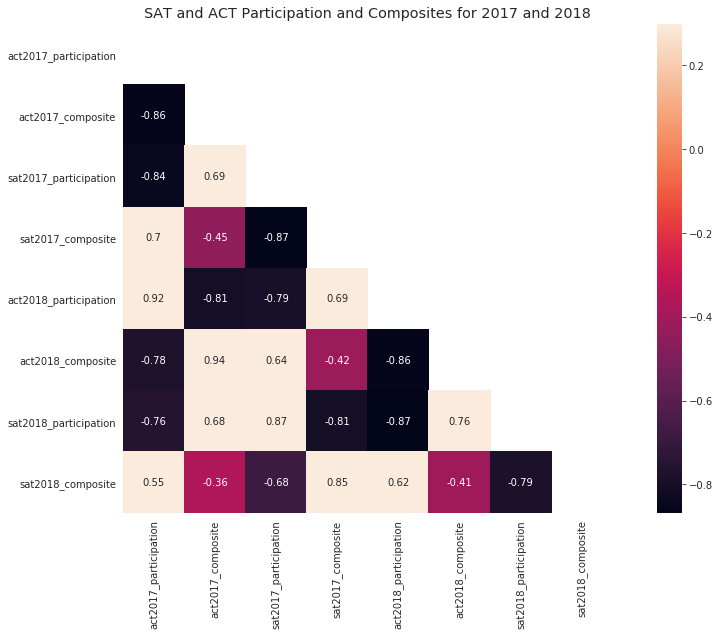

In [912]:
# Establish size of figure.
plt.figure(figsize=(16,9))

# Generate 10 variables of 200 random observations.
corr = df_filtered.corr()
#print(corr.shape)
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True).set_title('SAT and ACT Participation and Composites for 2017 and 2018')


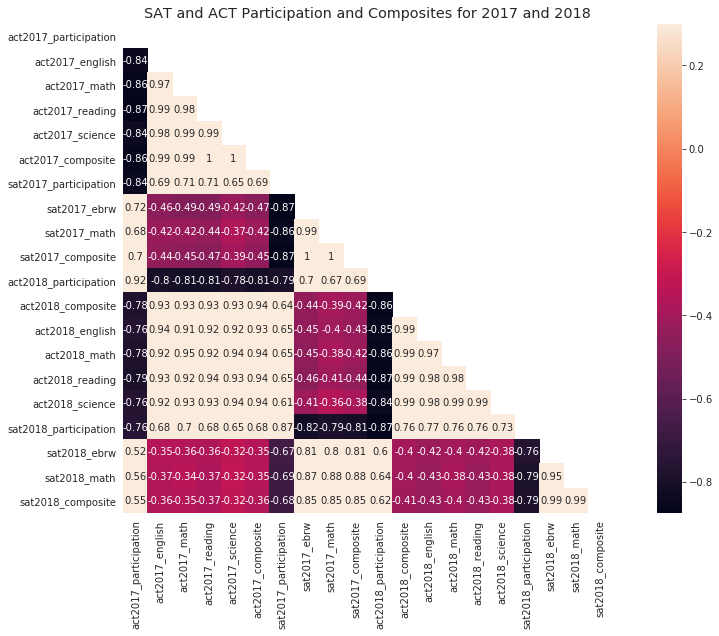

In [913]:
# Establish size of figure.
plt.figure(figsize=(16,9))

# Generate 10 variables of 200 random observations.
corr = df_combined.corr()
#print(corr.shape)
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True).set_title('SAT and ACT Participation and Composites for 2017 and 2018')


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [1033]:
plt.style.use('ggplot')
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], ax=ax[i], bins = 10, fit=norm, kde=True) # feel free to add more settings
        mean_val = dataframe[column].mean()
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i]) # Set titles, labels, etc here for each subplot
        ax[i].axvline(x = mean_val, label = "mean", color = "darkred").set_linestyle("--")
        ax[i].legend()

        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

#### SAT and ACT Participation Rates

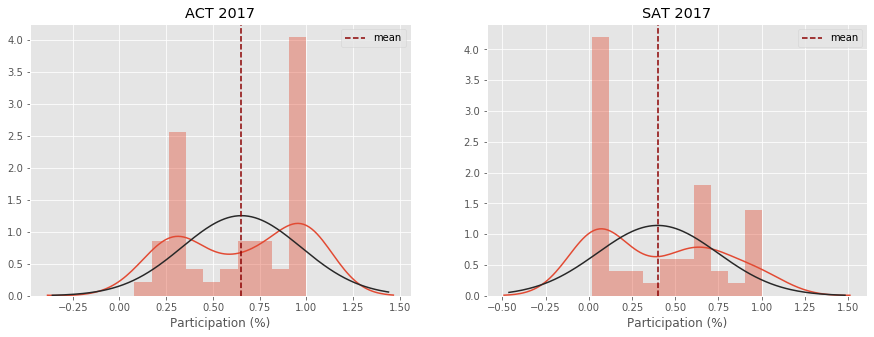

In [1034]:
# Code
subplot_histograms(df_combined, ["act2017_participation", "sat2017_participation"], ["ACT 2017", "SAT 2017"], ["Participation (%)", "Participation (%)"])

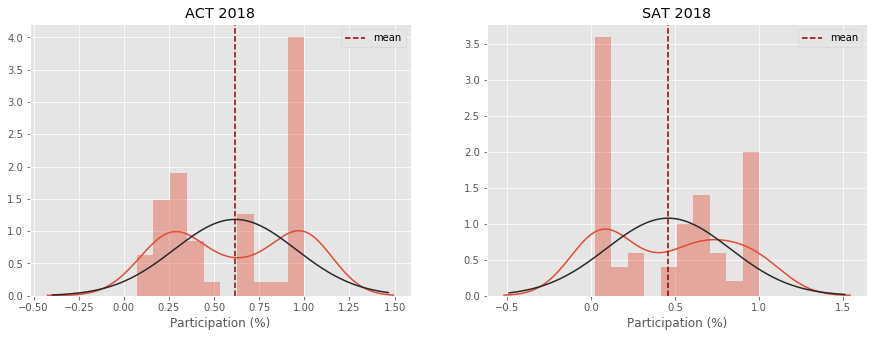

In [1024]:
subplot_histograms(df_combined, ["act2018_participation", "sat2018_participation"], ["ACT 2018", "SAT 2018"], ["Participation (%)", "Participation (%)"])

> The black curve represents a normal distribution based on the mean. The red curve represents an approximated distribution based on the data.
> From a glance, participation rates are not normally distributed for both the ACT and SAT across both years. Data is greatly skewed to either extreme due to state policies either mandating the ACT or SAT, or policies that provide free testing.

#### SAT and ACT Math Scores 

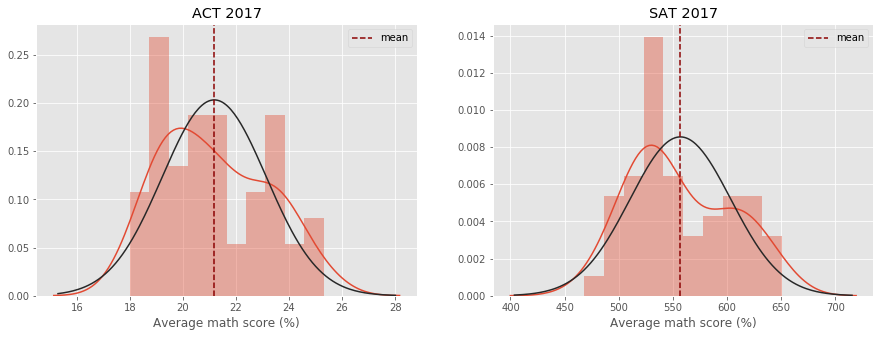

In [1025]:
subplot_histograms(df_combined, ["act2017_math", "sat2017_math"], ["ACT 2017", "SAT 2017"], ["Average math score (%)", "Average math score (%)"])

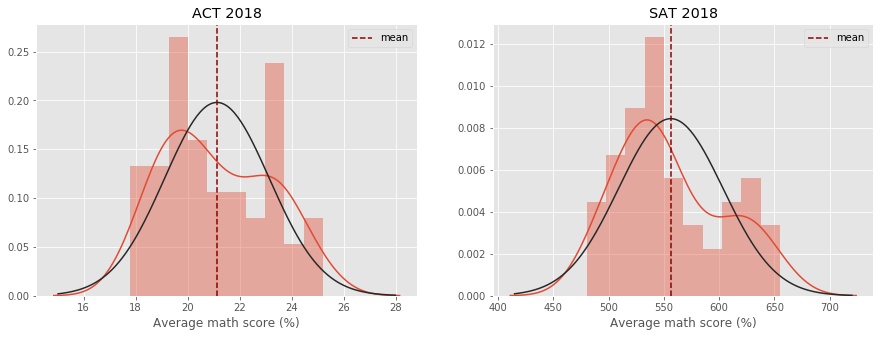

In [1026]:
subplot_histograms(df_combined, ["act2018_math", "sat2018_math"], ["ACT 2018", "SAT 2018"], ["Average math score (%)", "Average math score (%)"])

In [954]:
print(stats.normaltest(df_combined["act2017_math"]))
print(stats.normaltest(df_combined["act2018_math"]))
print(stats.normaltest(df_combined["sat2017_math"]))
print(stats.normaltest(df_combined["sat2018_math"]))

NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832)
NormaltestResult(statistic=9.493830792428861, pvalue=0.008678423456739134)
NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684)
NormaltestResult(statistic=4.8457529089366815, pvalue=0.08866620599134843)


> Whilst the math scores look roughly bell curved, only the sat2017 and sat2018 math sample passes the K squared test assuming an alpha of 0.05. 

#### SAT and ACT Reading/Verbal Scores

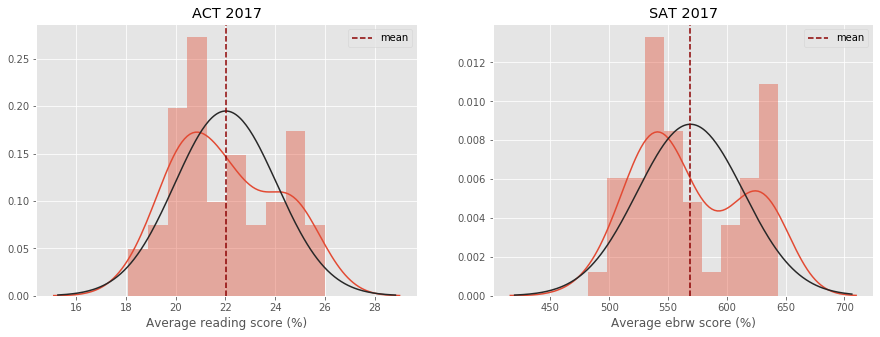

In [1027]:
subplot_histograms(df_combined, ["act2017_reading", "sat2017_ebrw"], ["ACT 2017", "SAT 2017"], ["Average reading score (%)", "Average ebrw score (%)"])

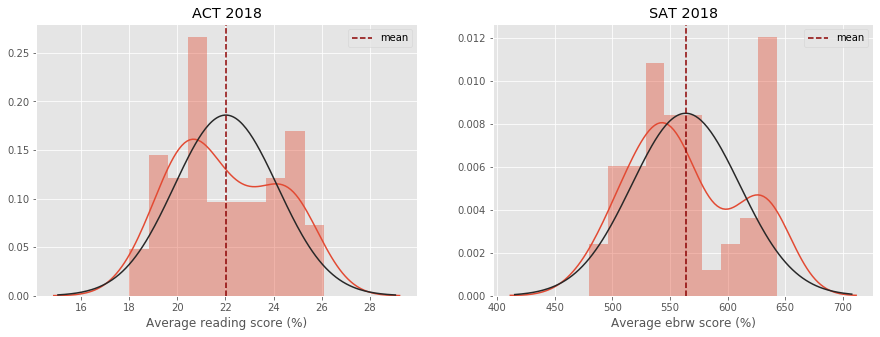

In [1028]:
subplot_histograms(df_combined, ["act2018_reading", "sat2018_ebrw"], ["ACT 2018", "SAT 2018"], ["Average reading score (%)", "Average ebrw score (%)"])

In [955]:
print(stats.normaltest(df_combined["act2017_reading"]))
print(stats.normaltest(df_combined["act2018_reading"]))
print(stats.normaltest(df_combined["sat2017_ebrw"]))
print(stats.normaltest(df_combined["sat2018_ebrw"]))

NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635)
NormaltestResult(statistic=9.408698591449367, pvalue=0.009055804952130748)
NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)
NormaltestResult(statistic=8.010167731290034, pvalue=0.01822276093099164)


> Whilst the reading scores look roughly bell curved, none of the samples pass the K squared test assuming an alpha of 0.05.

#### SAT and ACT Composite Scores 


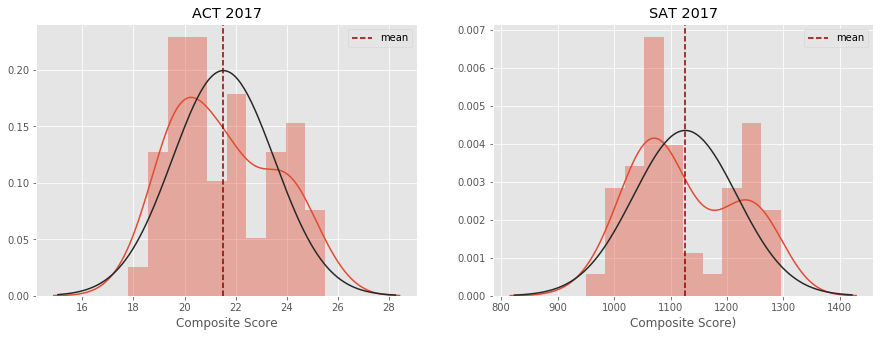

In [1029]:
subplot_histograms(df_combined, ["act2017_composite", "sat2017_composite"], ["ACT 2017", "SAT 2017"], ["Composite Score", "Composite Score)"])

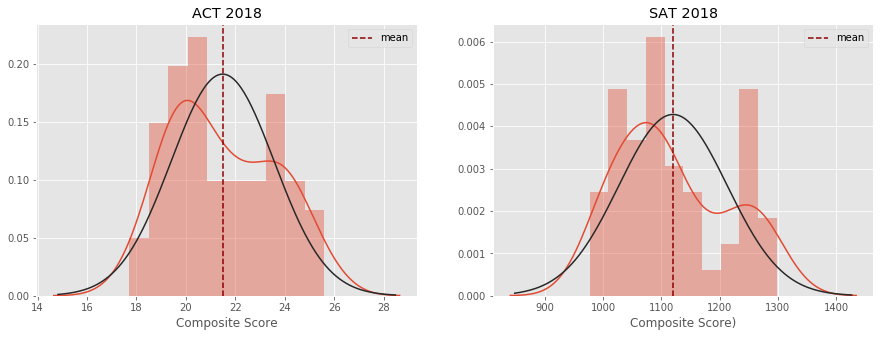

In [1030]:
subplot_histograms(df_combined, ["act2018_composite", "sat2018_composite"], ["ACT 2018", "SAT 2018"], ["Composite Score", "Composite Score)"])

In [1038]:
print(stats.normaltest(df_combined["act2017_composite"]))
print(stats.normaltest(df_combined["act2018_composite"]))
print(stats.normaltest(df_combined["sat2017_composite"]))
print(stats.normaltest(df_combined["sat2018_composite"]))

NormaltestResult(statistic=6.557389886662569, pvalue=0.03767739587231253)
NormaltestResult(statistic=8.70683791505615, pvalue=0.012862760086159716)
NormaltestResult(statistic=9.607185954097002, pvalue=0.008200230814088539)
NormaltestResult(statistic=8.459129644249382, pvalue=0.014558724804979849)


> None of the composite scores are normally distributed.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [1264]:
#Plots seaborn regplot
plt.style.use('ggplot')
def subplot_scatter(dataframe, list_of_x, list_of_y, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(18, 8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, x_axis in enumerate(list_of_x): # Gives us an index value to get into all our lists
        corr_val = round(dataframe[x_axis].corr(dataframe[list_of_y[i]]), 2) #finds correlation value to print on graph
        sns.regplot(x = dataframe[x_axis], y = dataframe[list_of_y[i]], data = dataframe, ax=ax[i]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i]) 
        ax[i].set_ylabel(list_of_ylabels[i])
        ax[i].set(xlim=(dataframe[x_axis].min()*0.98, dataframe[x_axis].max()*1.02)) # Manually tweak numbers to get ideal size        
        ax[i].set(ylim=(dataframe[list_of_y[i]].min()*0.98, dataframe[list_of_y[i]].max()*1.02))
        ax[i].text(0.75, 0.95, "Correlation: {}".format(corr_val), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)

####  SAT vs ACT math scores

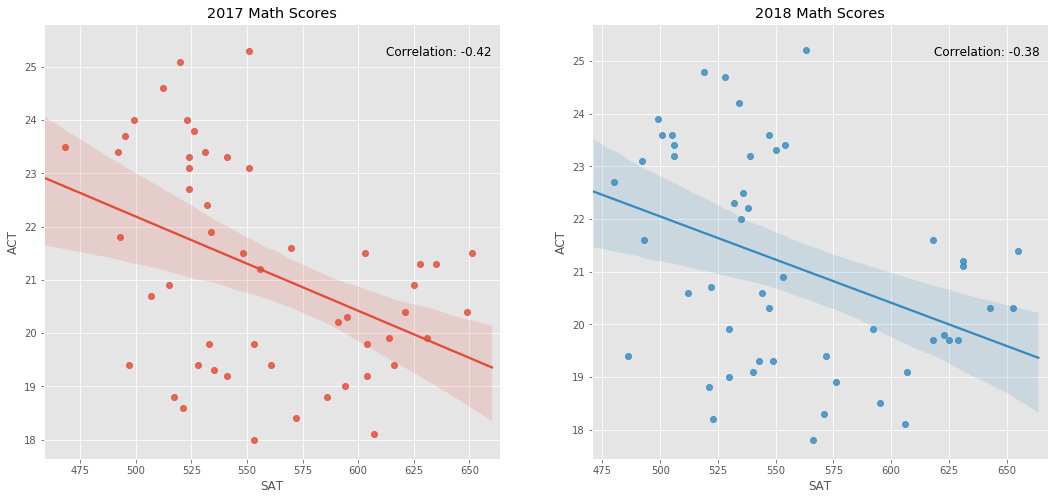

In [1265]:
subplot_scatter(df_combined, ["sat2017_math", "sat2018_math"], ["act2017_math", "act2018_math"], ["2017 Math Scores", "2018 Math Scores"], ["SAT", "SAT"], ["ACT", "ACT"])

> The SAT and ACT math scores have a negative correlation of moderate strength, with a correlation coefficient of -0.42 for the 2017 Math Scores and -0.38 for the 2018 Math Scores. The shaded area represents a bootstrap confidence interval and illustrates a degree of uncertainty and variance in the data. 

#### SAT vs. ACT verbal/reading scores

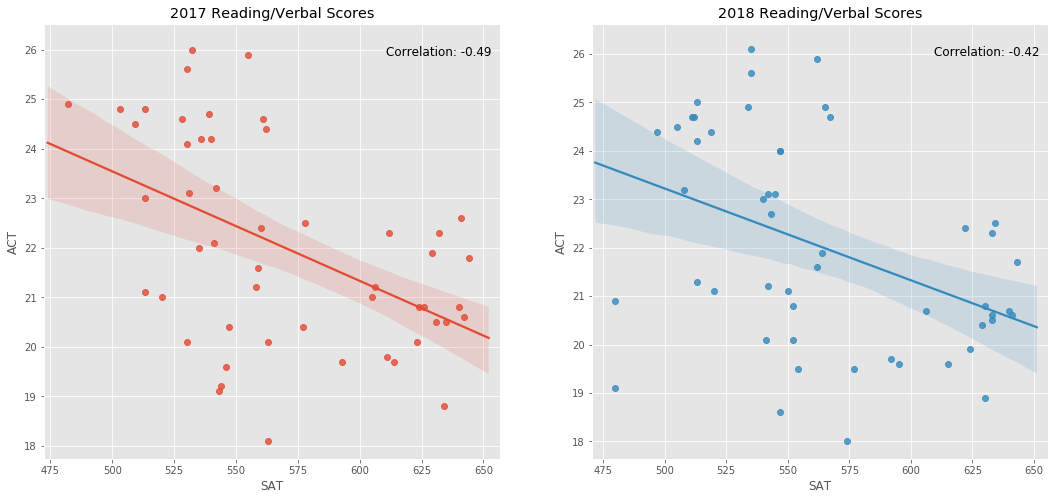

In [797]:
subplot_scatter(df_combined, ["sat2017_ebrw", "sat2018_ebrw"], ["act2017_reading", "act2018_reading"], ["2017 Reading/Verbal Scores", "2018 Reading/Verbal Scores"], ["SAT", "SAT"], ["ACT", "ACT"])

> Similar to the above Math Scores, the SAT Reading Scores and the ACT Reading Scores are negatively correlated, with a correlation coefficient of -0.49 and -0.42. Similar to Math, the confidence interval is fairly large.

#### SAT vs. ACT total/composite scores

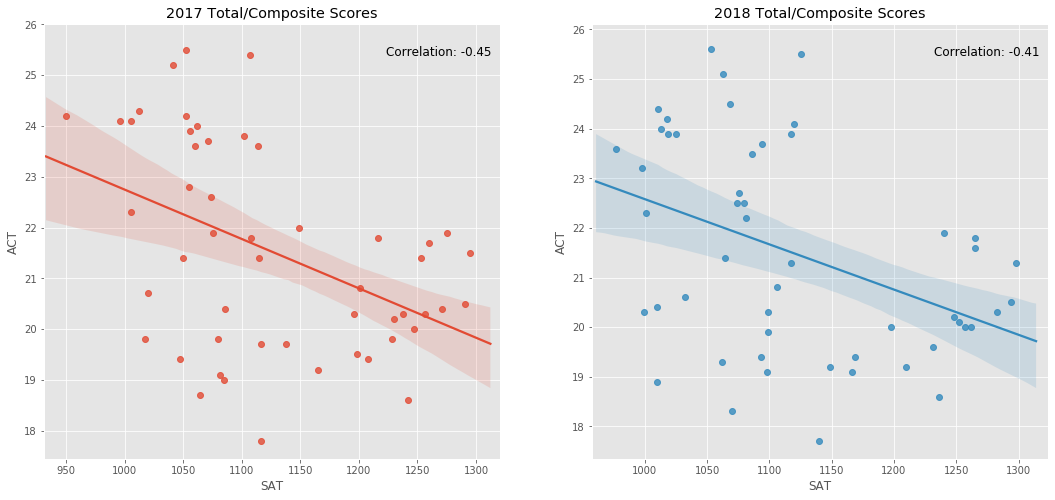

In [796]:
subplot_scatter(df_combined, ["sat2017_composite", "sat2018_composite"], ["act2017_composite", "act2018_composite"], ["2017 Total/Composite Scores", "2018 Total/Composite Scores"], ["SAT", "SAT"], ["ACT", "ACT"])

> As above, the scores are negatively correlated, with a correlation coefficient of -0.45 and -0.41.

#### Year on Year (2017 vs 2018) SAT and ACT Total/Composite Scores

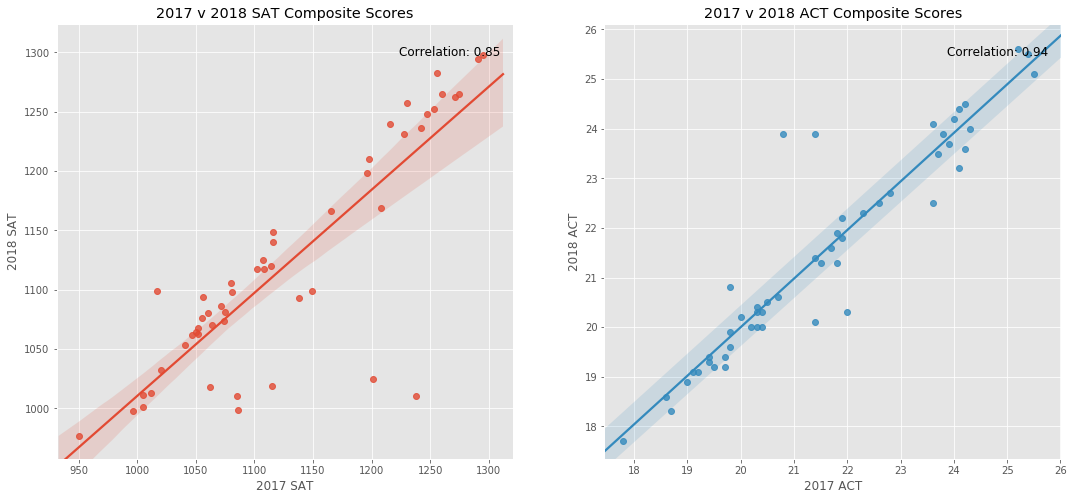

In [987]:
subplot_scatter(df_combined, ["sat2017_composite", "act2017_composite"], ["sat2018_composite", "act2018_composite"], ["2017 v 2018 SAT Composite Scores", "2017 v 2018 ACT Composite Scores"], ["2017 SAT", "2017 ACT"], ["2018 SAT", "2018 ACT"])

> Year on year SAT and ACT scores are strongly positively correlated (r_sat = 0.85 and r_act = 0.94). If a state does well on a test, it is very likely that the state will continue to do well in future years, barring any external factors like policy changes.

### 2017 Participation vs Total Scores

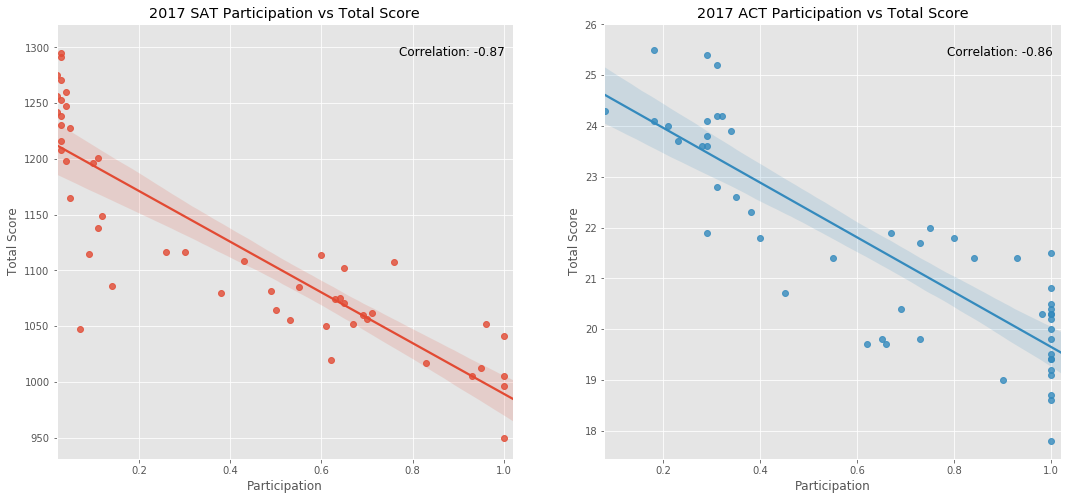

In [802]:
subplot_scatter(df_combined, ["sat2017_participation", "act2017_participation"], ["sat2017_composite", "act2017_composite"], ["2017 SAT Participation vs Total Score", "2017 ACT Participation vs Total Score"], ["Participation", "Participation"], ["Total Score", "Total Score"])

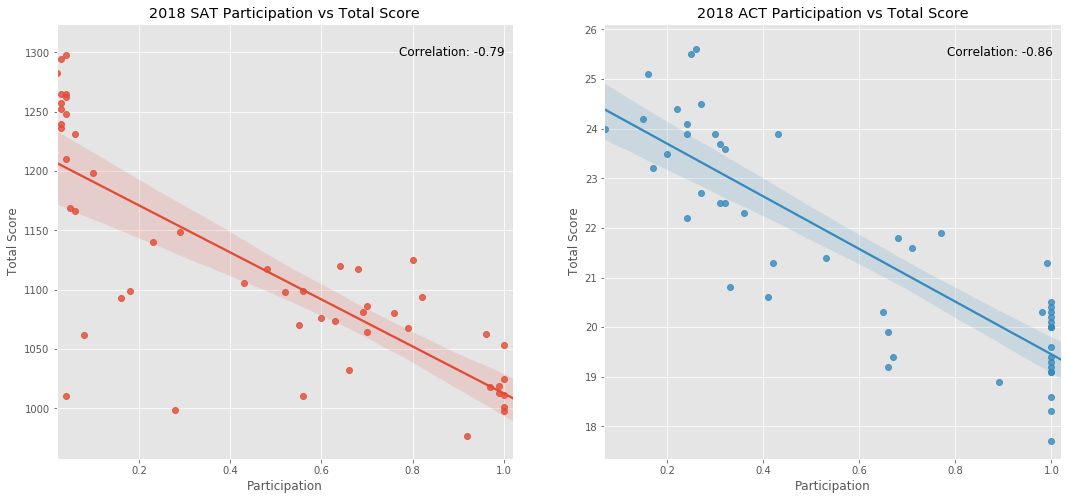

In [801]:
subplot_scatter(df_combined, ["sat2018_participation", "act2018_participation"], ["sat2018_composite", "act2018_composite"], ["2018 SAT Participation vs Total Score", "2018 ACT Participation vs Total Score"], ["Participation", "Participation"], ["Total Score", "Total Score"])

> As might be expected due to self-selection bias, participation rates and SAT scores are strongly negatively correlated. For states without mandatory tesing, it can be assumed that the students who take the test are strongly motivated, prepare accordingly, and expect to do well on the test.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
# Code
plt.style.use('ggplot')
def subplot_boxplots(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i]) # Set titles, labels, etc here for each subplot


In [848]:
plt.style.use('ggplot')
def subplot_boxplots(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i] = sns.boxplot(data = dataframe[column], width=0.3, ax=ax[i])
        ax[i].set(xticklabels = list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i])

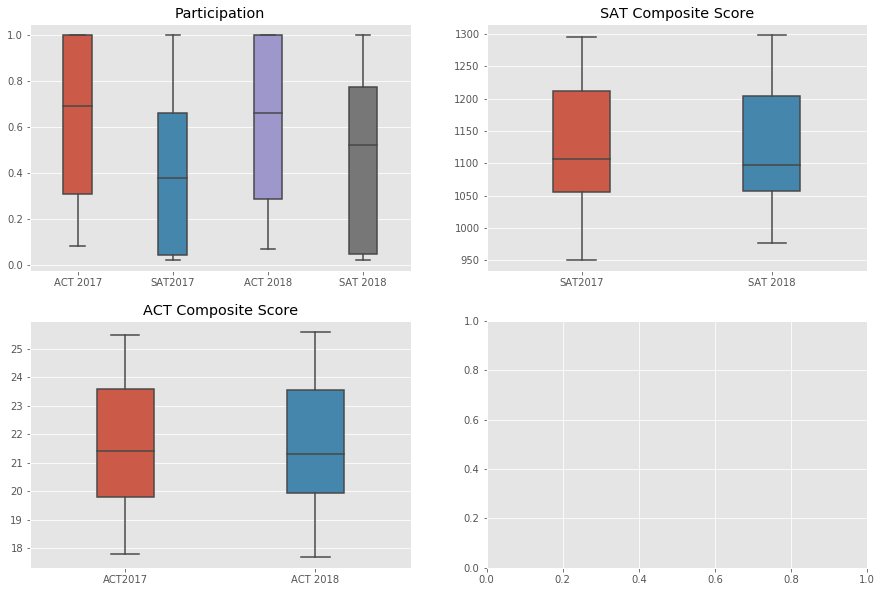

In [1266]:
plot1 = ["act2017_participation", "sat2017_participation", "act2018_participation", "sat2018_participation"]
plot2 = ["sat2017_composite", "sat2018_composite"]
plot3 = ["act2017_composite", "act2018_composite"]
label1 = ["ACT 2017", "SAT2017", "ACT 2018", "SAT 2018"]
label2 = ["SAT2017", "SAT 2018"]
label3 = ["ACT2017", "ACT 2018"]
subplot_boxplots(df_combined, [plot1, plot2, plot3], ["Participation", "SAT Composite Score", "ACT Composite Score"], [label1, label2, label3])

In [1010]:
def coefficient_of_variance(dataframe, column):
    CV = dataframe[column].std()/dataframe[column].mean()
    print("Coefficient of Variance for {} is {}".format(column, CV))

In [1012]:
coefficient_of_variance(df_combined, "act2017_participation")
coefficient_of_variance(df_combined, "act2018_participation")
coefficient_of_variance(df_combined, "sat2017_participation")
coefficient_of_variance(df_combined, "sat2018_participation")
coefficient_of_variance(df_combined, "act2017_composite")
coefficient_of_variance(df_combined, "act2018_composite")
coefficient_of_variance(df_combined, "sat2017_composite")
coefficient_of_variance(df_combined, "sat2018_composite")


Coefficient of Variance for act2017_participation is 0.49254295156557354
Coefficient of Variance for act2018_participation is 0.5528402633649158
Coefficient of Variance for sat2017_participation is 0.8862602195914605
Coefficient of Variance for sat2018_participation is 0.8156995597299574
Coefficient of Variance for act2017_composite is 0.09390017261856164
Coefficient of Variance for act2018_composite is 0.09802900898590443
Coefficient of Variance for sat2017_composite is 0.08213744141639034
Coefficient of Variance for sat2018_composite is 0.08406556643440724


> From the boxplots above, we can see that there are no outliers in the data. We can also see that the SAT participation rates tend to be skewed right, whilst the ACT participation rates are skewed left. There is also more variance in the participation rates for the SAT.

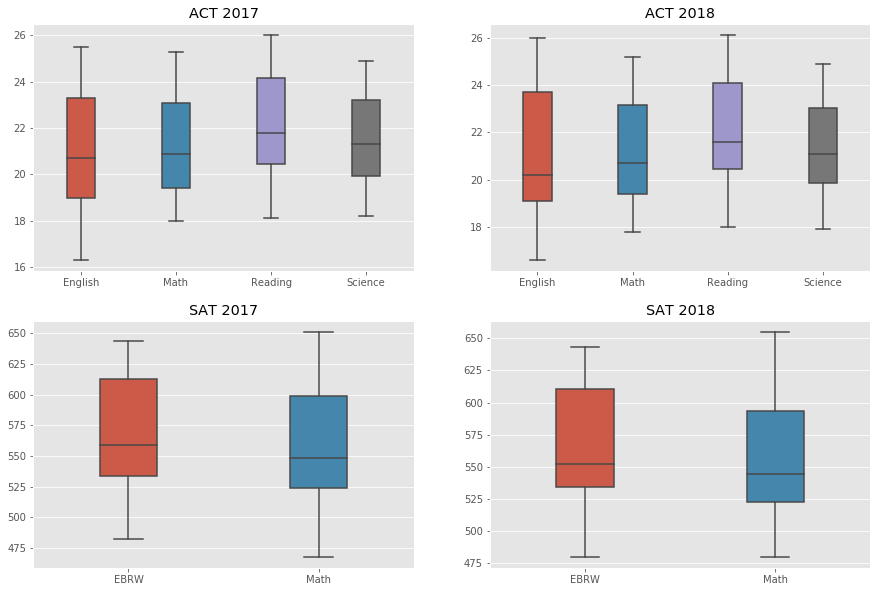

In [919]:
plot1 = ["act2017_english", "act2017_math", "act2017_reading", "act2017_science"]
plot2 = ["act2018_english", "act2018_math", "act2018_reading", "act2018_science"]
plot3 = ["sat2017_ebrw", "sat2017_math"]
plot4 = ["sat2018_ebrw", "sat2018_math"]
label1 = ["English", "Math", "Reading", "Science"]
label2 = ["English", "Math", "Reading", "Science"]
label3 = ["EBRW", "Math"]
label4 = ["EBRW", "Math"]
subplot_boxplots(df_combined, [plot1, plot2, plot3, plot4], ["ACT 2017", "ACT 2018", "SAT 2017", "SAT 2018"], [label1, label2, label3, label4])

In [ ]:
print("ACT 2017 Participation Std Dev: {}".format(df_combined["act2017_participation"].std()))
print("ACT 2018 Participation Std Dev: {}".format(df_combined["act2018_participation"].std()))
print("SAT 2017 Participation Std Dev: {}".format(df_combined["sat2017_participation"].std()))
print("SAT 2018 Participation Std Dev: {}".format(df_combined["sat2018_participation"].std()))

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [1046]:
df_states = pd.read_csv (r'https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [1055]:
#creating dict to map with from the dummy df downloaded from above
state_dict = dict(zip(df_states["state"], df_states["code"]))

In [1071]:
#the dict was missing DC
state_dict["District Of Columbia"]="DC"

In [1267]:
#Map state to state code (e.g. Texas to TX)
df_combined["code"]= df_combined["state"].map(lambda x: state_dict[x])

In [1076]:
fig = go.Figure(data=go.Choropleth(
    locations=df_combined["code"], # Spatial coordinates
    z = df_combined["sat2017_participation"], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Percentage Participation",
))

fig.update_layout(
    title_text = "2017 SAT Participation",
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [1079]:
fig = go.Figure(data=go.Choropleth(
    locations=df_combined["code"], # Spatial coordinates
    z = df_combined["sat2018_participation"], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Percentage Participation",
))

fig.update_layout(
    title_text = "2018 SAT Participation",
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [1086]:
fig = go.Figure(data=go.Choropleth(
    locations=df_combined["code"], # Spatial coordinates
    z = df_combined["act2017_participation"], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage Participation",
))

fig.update_layout(
    title_text = "2017 ACT Participation",
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [1083]:
fig = go.Figure(data=go.Choropleth(
    locations=df_combined["code"], # Spatial coordinates
    z = df_combined["act2018_participation"], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage Participation",
))

fig.update_layout(
    title_text = "2018 ACT Participation",
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# Additional charts for presentation

In [1094]:
df_filtered["act2017_normal"]=df_filtered["act2017_composite"]/36
df_filtered["act2018_normal"]=df_filtered["act2018_composite"]/36
df_filtered["sat2017_normal"]=df_filtered["sat2017_composite"]/1600
df_filtered["sat2018_normal"]=df_filtered["sat2018_composite"]/1600

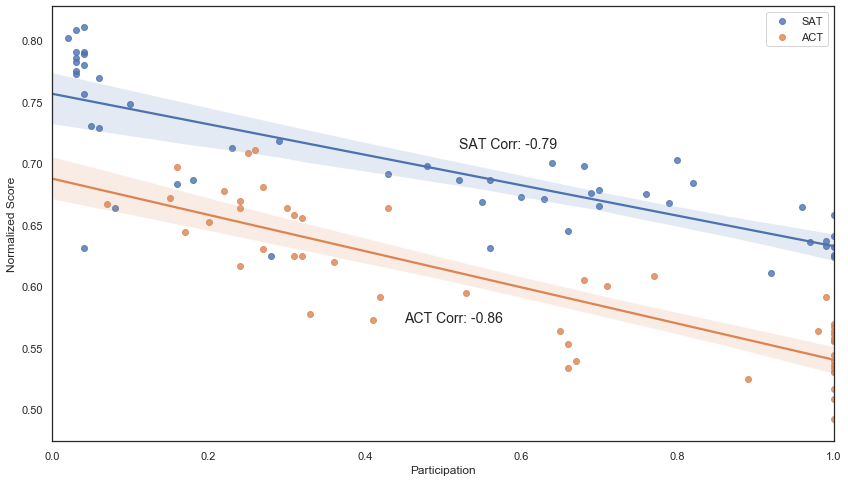

In [1128]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14, 8)) # You'll want to specify your figsize
sns.regplot(x = "sat2018_participation", y = "sat2018_normal", data = df_filtered, ax = ax, label = "SAT")
sns.regplot(x = "act2018_participation", y = "act2018_normal", data = df_filtered, ax = ax, label = "ACT")
ax.set_xlabel("Participation")
ax.set_ylabel("Normalized Score")
ax.set_xlim(0, 1)
ax.text(0.52, 0.7, "SAT Corr: {}".format(round(df_filtered["sat2018_participation"].corr(df_filtered["sat2018_normal"]), 2)), ha="left", va="top", transform=ax.transAxes, fontsize=14)      
ax.text(0.45, 0.3, "ACT Corr: {}".format(round(df_filtered["act2018_participation"].corr(df_filtered["act2018_normal"]), 2)), ha="left", va="top", transform=ax.transAxes, fontsize=14)     
ax.legend()

In [1181]:
df_case = df_filtered[["sat2017_composite", "sat2018_composite"]][df_filtered["state"]=="Oklahoma"]
df_case = df_case.append(df_filtered[["sat2017_composite", "sat2018_composite"]][df_filtered["state"]=="District Of Columbia"])
df_case = df_case.append(df_filtered[["sat2017_composite", "sat2018_composite"]][df_filtered["state"]=="Michigan"])
df_case = df_case.append(df_filtered[["sat2017_composite", "sat2018_composite"]][df_filtered["state"]=="Illinois"])

In [1169]:
df_case

,state,sat2017_composite,sat2018_composite
37,Oklahoma,1047.0,1062.0
9,District Of Columbia,950.0,977.0
23,Michigan,1005.0,1011.0
14,Illinois,1115.0,1019.0


In [1182]:
df_case

,sat2017_composite,sat2018_composite
37,1047.0,1062.0
9,950.0,977.0
23,1005.0,1011.0
14,1115.0,1019.0


In [1180]:
df_case.iloc[0, 1:3])

sat2017_composite    1047
sat2018_composite    1062
Name: 37, dtype: object


In [1232]:
df_filtered.set_index("state").head(2)

,act2017_participation,act2017_composite,sat2017_participation,sat2017_composite,act2018_participation,act2018_composite,sat2018_participation,sat2018_composite,act2017_normal,act2018_normal,sat2017_normal,sat2018_normal
state,,,,,,,,,,,,
Alabama,1.00,19.2,0.05,1165.0,1.00,19.1,0.06,1166.0,0.533333,0.530556,0.728125,0.72875
Alaska,0.65,19.8,0.38,1080.0,0.33,20.8,0.43,1106.0,0.550000,0.577778,0.675000,0.69125


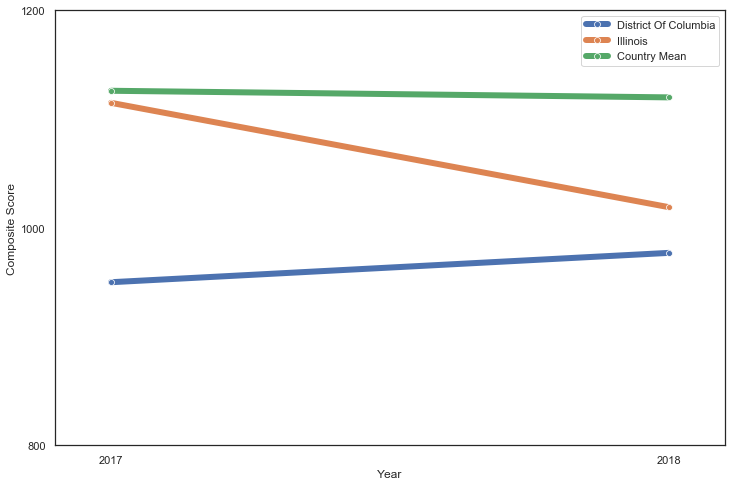

In [1244]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12, 8)) # You'll want to specify your figsize

sns.lineplot(x = ["2017", "2018"], y = [950, 977], ax = ax, label = "District Of Columbia", marker = "o", linewidth=6)
sns.lineplot(x = ["2017", "2018"], y = [1115, 1019], ax = ax, label = "Illinois", marker = "o", linewidth=6)
sns.lineplot(x = ["2017", "2018"], y = [df_combined["sat2017_composite"].mean(), df_combined["sat2018_composite"].mean()], ax = ax, label = "Country Mean", marker = "o", dashes=True, linewidth=6)


ax.set_xlabel("Year")
ax.set_ylabel("Composite Score")
ax.set_ylim(800, 1200)
ax.set_xlim(-0.1, 1.1)
sns.set(font_scale=5) 

In [1241]:
df_case = df_filtered[["sat2017_participation", "sat2018_participation"]][df_filtered["state"]=="Oklahoma"]
df_case = df_case.append(df_filtered[["sat2017_participation", "sat2018_participation"]][df_filtered["state"]=="District Of Columbia"])
df_case = df_case.append(df_filtered[["sat2017_participation", "sat2018_participation"]][df_filtered["state"]=="Michigan"])
df_case = df_case.append(df_filtered[["sat2017_participation", "sat2018_participation"]][df_filtered["state"]=="Illinois"])

In [1242]:
df_case

,sat2017_participation,sat2018_participation
37,0.07,0.08
9,1.00,0.92
23,1.00,1.00
14,0.09,0.99


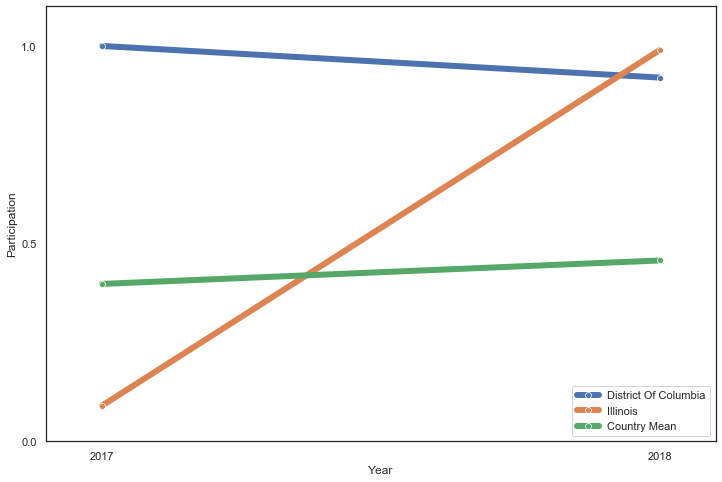

In [1248]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12, 8)) # You'll want to specify your figsize
sns.lineplot(x = ["2017", "2018"], y = [1, 0.92], ax = ax, label = "District Of Columbia", marker = "o", linewidth=6)
sns.lineplot(x = ["2017", "2018"], y = [0.09, 0.99], ax = ax, label = "Illinois", marker = "o", linewidth=6)
sns.lineplot(x = ["2017", "2018"], y = [df_combined["sat2017_participation"].mean(), df_combined["sat2018_participation"].mean()], ax = ax, label = "Country Mean", marker = "o", dashes=True, linewidth=6)


ax.set_xlabel("Year")
ax.set_ylabel("Participation")
ax.set_ylim(0, 1.1)
ax.set_xlim(-0.1, 1.1)
sns.set(font_scale=5) 

In [1249]:
df_case = df_filtered[["act2017_participation", "act2018_participation"]][df_filtered["state"]=="Ohio"]
df_case = df_case.append(df_filtered[["act2017_participation", "act2018_participation"]][df_filtered["state"]=="Colorado"])

In [1250]:
df_case

,act2017_participation,act2018_participation
36,0.75,1.0
6,1.00,0.3


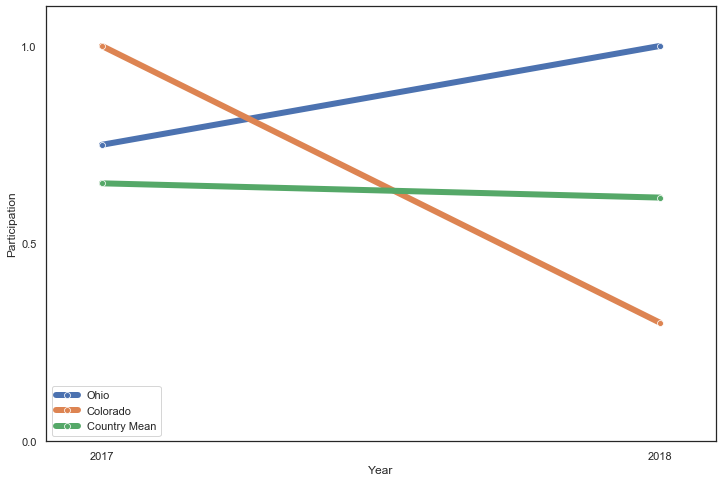

In [1253]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12, 8)) # You'll want to specify your figsize
sns.lineplot(x = ["2017", "2018"], y = [0.75, 1], ax = ax, label = "Ohio", marker = "o", linewidth=6)
sns.lineplot(x = ["2017", "2018"], y = [1, 0.3], ax = ax, label = "Colorado", marker = "o", linewidth=6)
sns.lineplot(x = ["2017", "2018"], y = [df_combined["act2017_participation"].mean(), df_combined["act2018_participation"].mean()], ax = ax, label = "Country Mean", marker = "o", dashes=True, linewidth=6)


ax.set_xlabel("Year")
ax.set_ylabel("Participation")
ax.set_ylim(0, 1.1)
ax.set_xlim(-0.1, 1.1)
sns.set(font_scale=5) 

In [1252]:
df_case = df_filtered[["act2017_composite", "act2018_composite"]][df_filtered["state"]=="Ohio"]
df_case = df_case.append(df_filtered[["act2017_composite", "act2018_composite"]][df_filtered["state"]=="Colorado"])
df_case

,act2017_composite,act2018_composite
36,22.0,20.3
6,20.8,23.9


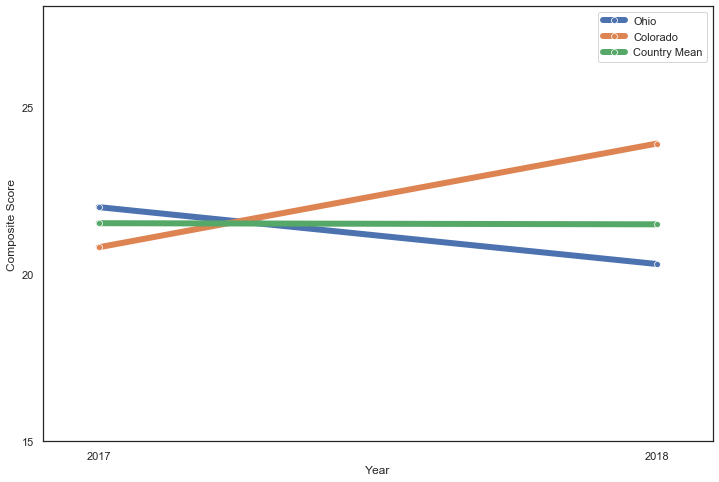

In [1259]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12, 8)) # You'll want to specify your figsize
sns.lineplot(x = ["2017", "2018"], y = [22, 20.3], ax = ax, label = "Ohio", marker = "o", linewidth=6)
sns.lineplot(x = ["2017", "2018"], y = [20.8, 23.9], ax = ax, label = "Colorado", marker = "o", linewidth=6)
sns.lineplot(x = ["2017", "2018"], y = [df_combined["act2017_composite"].mean(), df_combined["act2018_composite"].mean()], ax = ax, label = "Country Mean", marker = "o", dashes=True, linewidth=6)


ax.set_xlabel("Year")
ax.set_ylabel("Composite Score")
ax.set_ylim(15, 28)
ax.set_xlim(-0.1, 1.1)
sns.set(font_scale=5) 

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [1293]:
df_stats = df_combined.describe().transpose()

In [1295]:
#Coefficient of Variation
df_stats["CV"] = df_stats["std"]/df_stats["mean"]

In [1300]:
df_stats

,count,mean,std,min,25%,50%,75%,max,CV
act2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0,0.492543
act2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5,0.112447
act2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3,0.093568
act2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0,0.093908
act2017_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9,0.081085
act2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5,0.093900
sat2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0,0.886260
sat2017_ebrw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0,0.080242
sat2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0,0.084616
sat2017_composite,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0,0.082137


Answers:

Measures of central tendency (i.e. mean, median, etc) are summarized from above.

Some additional notes (that are summarized from the graphs and notes previously established):
>ACT participation - not normally distributed, skewed left. For 2017, the std dev is 0.32 and CV is 49%, which indicates a large spread. Likewise, the std dev and CV for 2018 are 0.34 and 55% respectively. 

>SAT participation - not normally distributed, skewed left. Std dev and CV are much higher than ACT participation, at 0.35 and 88% for 2017 and 0.37 and 82% for 2018. This suggests that the SAT participation rates vary much more across states when compared to the ACT.

>ACT component and composite scores - not normally distributed. Std devs are fairly similar, although it is interesting to note that the std dev and CV for math scores across both years are significantly lower than the reading, science, and english scores. Mean scores are fairly close as well, with reading being America's strongest subject by a slim margin.

>SAT component and composite scores - only the SAT math score are normally distributed, as established in the histogram section above. SAT EBRW and Math share similar std dev and CV.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

> No - most of the data is not normally distributed. Of all the variables, only the SAT math scores appear to be normally distributed assuming an alpha of 0.05.


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

> As highlighted in the graphs above, only the SAT 2017 and SAT 2018 maths scores approximate a normal distribution based on an alpha of 0.05. Without a normal distribution, this affects our ability to make assumptions of the population as a whole based on a given sample, or may indicate outliers.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
>It does not make sense to conduct statistical inference  on the relationship between SAT and ACT participation rates, particularly correlation.

>There are extraneous variables that affect the relationship between SAT and ACT participation, such as states enacting policies mandating a certain test. As such, it is difficult or near impossible to establish causality between SAT and ACT participation rates despite the high correlation.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
> No, it does not make sense to a certain extent. Certain statistical inferences can be made, but it should be noted that the SAT math scores are normally distributed while the ACT math scores are not.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

It's not appropriate or relevant to the data/points I am interested in, due to the lack of normality.

In [1302]:
stats.ttest_ind(df_combined["sat2017_math"], df_combined["sat2018_math"], equal_var=False)

Ttest_indResult(statistic=0.06886440276247592, pvalue=0.9452350939411734)

>Since 0.94 is greater than our alpha of 0.05, we reject the null hypothesis that the 2017 and 2018 math results are the same. So we can say with some confidence that the two results are significantly different, and not the result of chance. This finding, however, offers nothing for our analysis.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

> Oklahoma offers the SAT for free, but it is not mandatory. District of Columbia offers the SAT for free, but it is not mandatory.

> Michigan and Illinois offer the SAT for free, and it is mandatory.

> Refer to the additional plots section for more information.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Participation Rate is likely to drop significantly if we move to optional testing, and this is undesirable for the state

Moving from a mandatory test to an optional test will unsurprisingly:
Lower participation rates
Increase average scores

Further longitudinal data would be needed before making a clear recommendation, and cohort data on post-highschool education admission.


